# Linear Regression

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

## Reading in the Data

In [2]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Text(0.5, 1.0, 'Hours studied vs Scores')

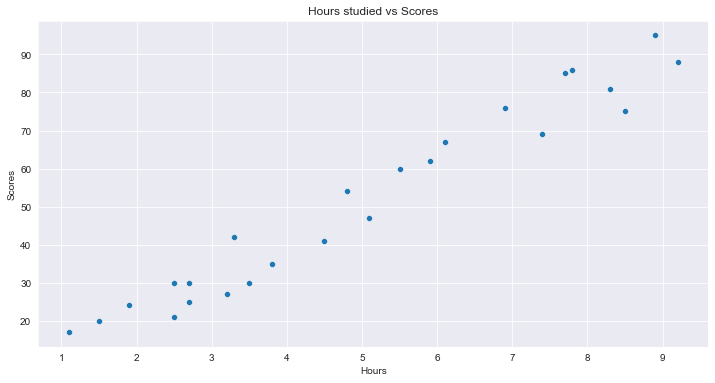

In [5]:
#Plotting the values

plt.figure(figsize=(12,6))
sns.scatterplot(
    x = 'Hours',
    y = 'Scores',
    data = data)
plt.title('Hours studied vs Scores')

## Training the Model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = data['Hours'].values.reshape(-1,1)
y = data['Scores'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train, y_train)

LinearRegression()

In [12]:
print(f'Linear Regression Equation\nScore = {lm.intercept_} + Hours({lm.coef_[0]})')

Linear Regression Equation
Score = 1.5079104828268655 + Hours(9.940615143138501)


## Prediction

In [13]:
y_pred = lm.predict(X_test)

Text(0.5, 1.0, 'Hours studied vs Scores')

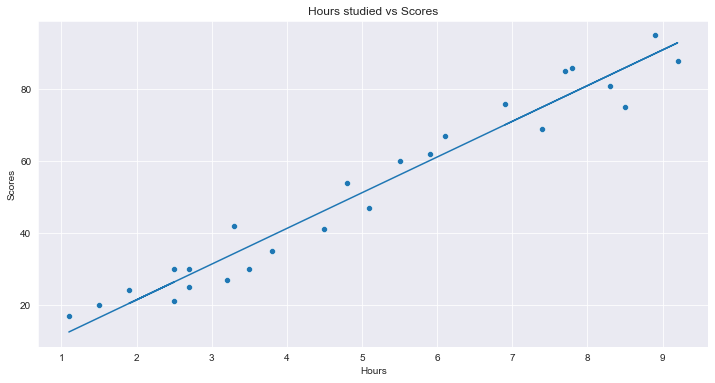

In [14]:
#Plotting the regression line

plt.figure(figsize=(12,6))
sns.scatterplot(
    x = 'Hours',
    y = 'Scores',
    data = data)

plt.plot(X_test, y_pred)
plt.title('Hours studied vs Scores')

What will be predicted score if a student studies for 9.25hrs/day?

In [15]:
hours = 9.25
h = np.array([hours]).reshape(1,-1)
print(f'The student will get a predicted score of {lm.predict(h)[0]}')

The student will get a predicted score of 93.45860055685802


## Model Evaluation

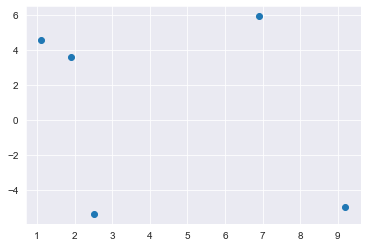

In [16]:
#Plotting the residual error

plt.scatter(
    y = y_test-y_pred,
    x = X_test)

The residual error plot looks good

In [17]:
from sklearn.metrics import r2_score

Using R-squared score as the metric for evaluation. R-squared measures the proportion of variance for a dependent variable that is explained by an independent variable in a regression model

In [18]:
r2_score(y_test, y_pred)

0.9735538080811826

A value of 0.97 is quite high. This may be as a result of small sample size.